In [0]:
!git clone https://github.com/riolaf05/covid19-mask-recognition

In [0]:
import cv2,os

data_path='/content/covid19-mask-recognition/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

In [0]:
#preprocess

img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            #converto le immagini in b/n
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                       
            #ridimensiono le immagini in 100x100 per avere una dimensione comune
            resized=cv2.resize(gray,(img_size,img_size))

            #salvo le immagini modificate in un array
            data.append(resized)

            #creo la lista delle label per ogni immagine
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)
            

In [0]:
data[0]

In [0]:
import numpy as np

#normalizzo le immagini
data=np.array(data)/255.0

#creo l'array numpy
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

#creo il one hot encoding per l'output
new_target=np_utils.to_categorical(target)

In [0]:
#esporto gli array numpy
np.save('data',data)
np.save('target',new_target)

In [0]:
#import degli array numpy 

import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 9s 9ms/step - loss: 0.8227 - accuracy: 0.4970 - val_loss: 0.6930 - val_accuracy: 0.5081
Epoch 2/20
990/990 [==============================] - 1s 838us/step - loss: 0.6938 - accuracy: 0.4970 - val_loss: 0.6925 - val_accuracy: 0.5081
Epoch 3/20
990/990 [==============================] - 1s 856us/step - loss: 0.6935 - accuracy: 0.4662 - val_loss: 0.6930 - val_accuracy: 0.5081
Epoch 4/20
990/990 [==============================] - 1s 835us/step - loss: 0.6924 - accuracy: 0.5707 - val_loss: 0.6915 - val_accuracy: 0.5081
Epoch 5/20
990/990 [==============================] - 1s 851us/step - loss: 0.6944 - accuracy: 0.5030 - val_loss: 0.6941 - val_accuracy: 0.5040
Epoch 6/20
990/990 [==============================] - 1s 848us/step - loss: 0.6919 - accuracy: 0.5313 - val_loss: 0.6918 - val_accuracy: 0.5403
Epoch 7/20
990/990 [==============================] - 1s 841us/step - loss: 0.6766 - accurac

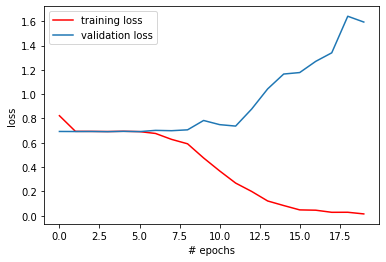

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

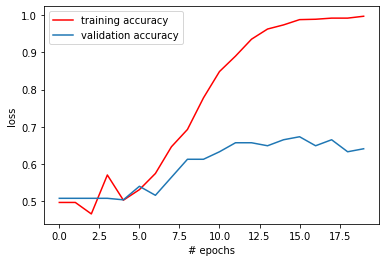

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 785us/step
[1.273290349089581, 0.717391312122345]


In [0]:
model.save('masked_recognition.h5')